# Exploring Datetime Data with Statsmodels

In [130]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
import statsmodels as stat

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
os.getcwd()

'C:\\Users\\Sam Cannon\\Desktop\\Python\\Udemy Courses\\Timeseries Forecasting\\05-Time-Series-Analysis-with-Statsmodels'

In [5]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Udemy Courses\\Timeseries Forecasting\\Data')

In [6]:
df = pd.read_csv('macrodata.csv', index_col = 0, parse_dates = True )

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


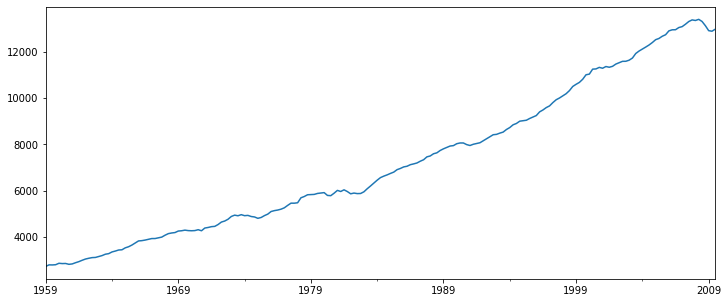

In [8]:
#plot out realgdp
df.realgdp.plot(figsize = (12, 5))

In [12]:
#use statsmodels to get the trend (hodrick-prescott filter)
from statsmodels.tsa.filters.hp_filter import hpfilter

In [13]:
#notice how the lambda value is 1600, this is becuase it is quarterly data
hpfilter

<function statsmodels.tsa.filters.hp_filter.hpfilter(X, lamb=1600)>

In [15]:
# tuple unpacking gdp_cycle, gdp_trend
gdp_cycle, gdp_trend = hpfilter(df.realgdp, lamb = 1600)

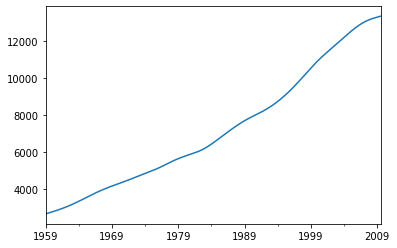

In [18]:
gdp_trend.plot()

In [19]:
#we can plot this trend on top of the actual data by adding the trend column to our df
df['trend'] = gdp_trend

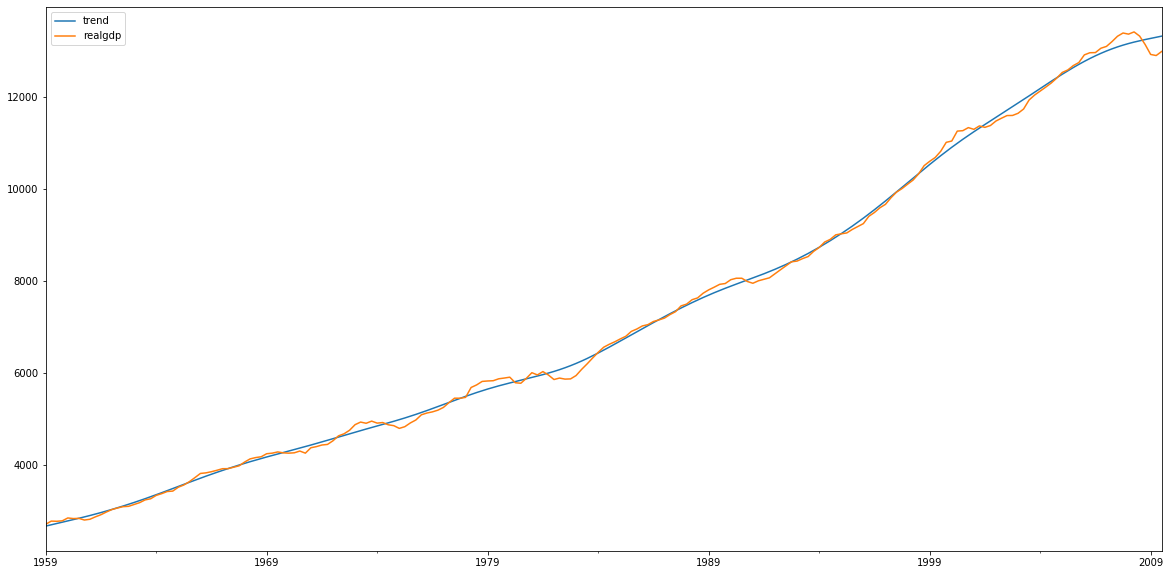

In [21]:
#look at the whole trend
df[['trend', 'realgdp']].plot(figsize = (20, 10))

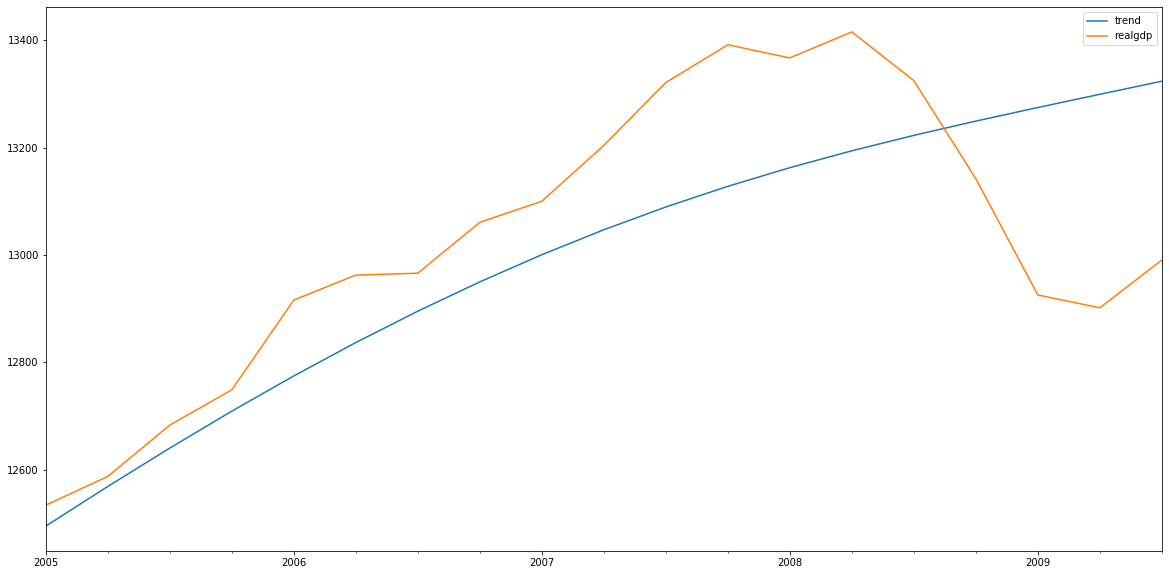

In [24]:
#look at a specific time window (here I just wanted to see past 2005), you can see when the recession hit in 2008, the trend was slowed
df[['trend', 'realgdp']]['2005':].plot(figsize = (20, 10))

## ETS Decomposition

## ETS

## Error/Trend/Seasonality Models
As we begin working with <em>endogenous</em> data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. These fall under the category of <em>state space models</em>, and include <em>decomposition</em> (described below), and <em>exponential smoothing</em>.

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS). We've already seen a simplistic example of this in the <strong>Introduction to Statsmodels</strong> section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.

## Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [28]:
#read in airline data to explore
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)

In [29]:
#drop the missingness
airline.dropna(inplace = True)

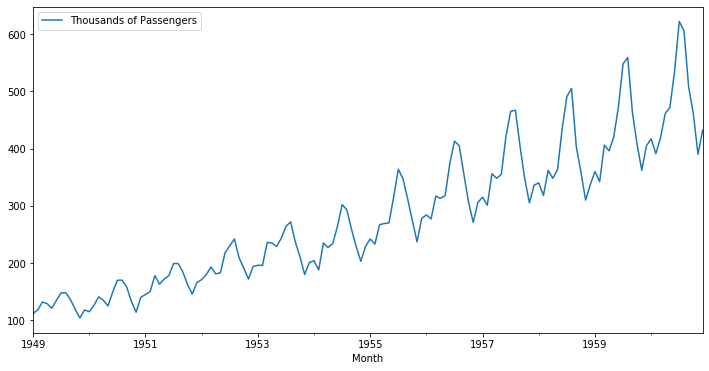

In [31]:
#trend is increasing at a higher rate than simply linear, so we are going to use a 'multiplicative' model for this
airline.plot(figsize = (12, 6))

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
#this is basically separating our data into three different facets, error/seasonality/trend, so we can call those three things as if they are methods of the 
# multiplicative model
results = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplicative')

In [44]:
# calling the data, I can also do results.seasonal and results.trend to get those data points as well
results.resid

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
1950-04-01    1.014048
1950-05-01    0.926903
1950-06-01    0.965041
1950-07-01    0.983557
1950-08-01    0.973372
1950-09-01    1.022505
1950-10-01    0.972193
1950-11-01    0.938953
1950-12-01    1.006791
1951-01-01    1.013845
1951-02-01    1.064018
1951-03-01    1.091854
1951-04-01    1.017665
1951-05-01    1.051583
1951-06-01    0.946044
                ...   
1958-07-01    1.048384
1958-08-01    1.078970
1958-09-01    0.985654
1958-10-01    0.997797
1958-11-01    0.980294
1958-12-01    0.940569
1959-01-01    0.982518
1959-02-01    0.950574
1959-03-01    0.978528
1959-04-01    0.974644
1959-05-01    1.017764
1959-06-01    0.996861
1959-

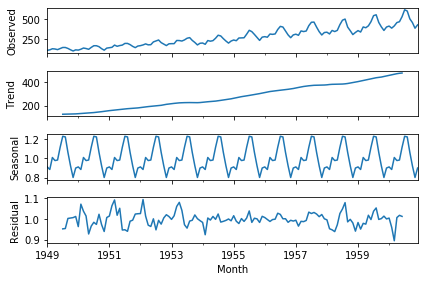

In [49]:
results.plot();

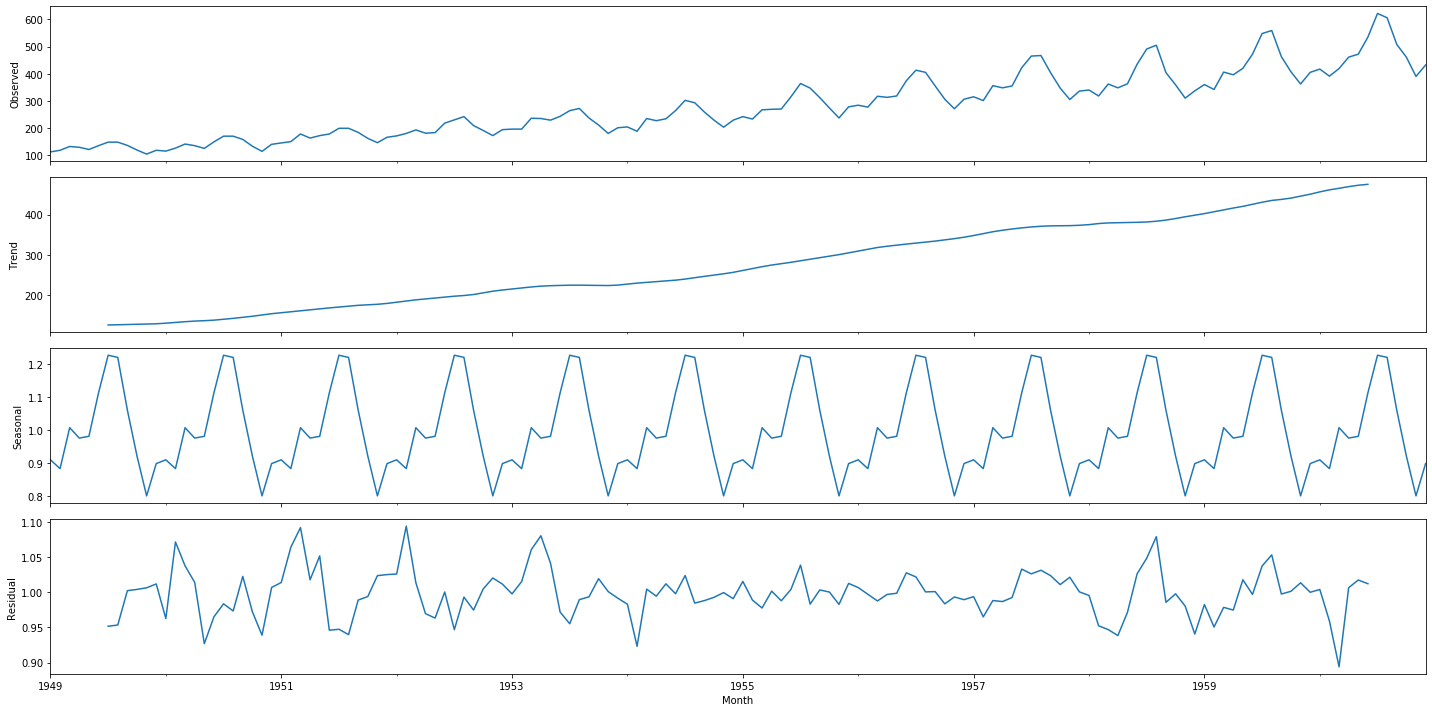

In [55]:
#make plot larger
# BTW this is just really awesome to see
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10 #specify figsize

results.plot(); #we have to put the ; after the plot for some reason, its weird without it 

## Exponentially Weighted Moving Averages

- While simple moving averages (using the rolling() function to look over a window) are great to look at trends, they have several weaknesses

    * Smaller windows will lead to more noise, rather than signal
    * It will always lag by the size of the window
    * It will never reach to full peak or valley of the data due to the averaging.
    * Does not really inform you about possible future behavior, all it really does is describe trends in your data.
    * Extreme historical values can skew your SMA significantly
    
### What is an Exponentially Weighted Moving Average? What does it do?
- EWMA will allows you to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.

- For more info on exponential smoothing, you can read this article https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

## The function .ewm() gives us the exponentially weighted moving average and must take one of the arguments below

- Documentation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [56]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

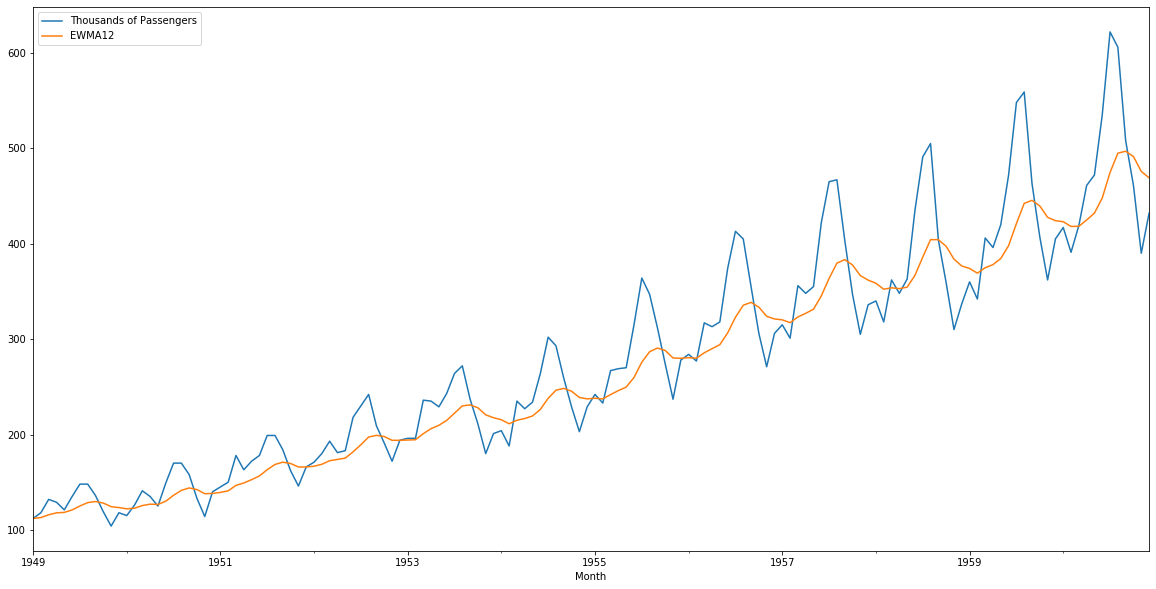

In [57]:
airline[['Thousands of Passengers','EWMA12']].plot();

## How does this compare to a Simple Moving Average?

In [63]:
#to plot this with the EWMA, we have to create a new column and add it into the data
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

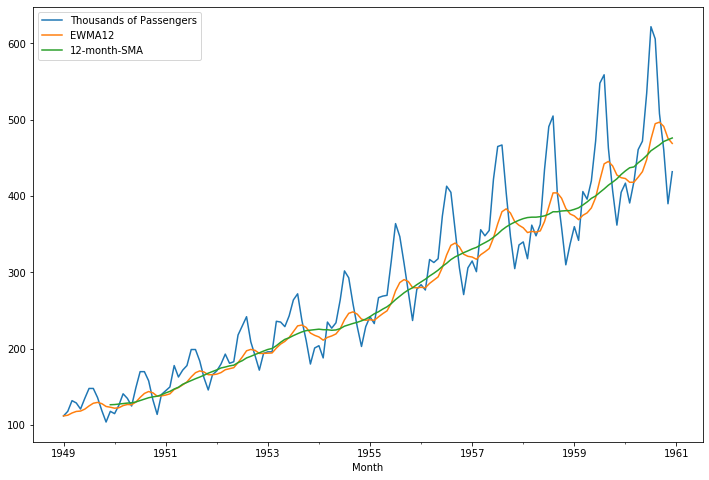

In [71]:
# the EWMA clearly fits the data better than an SMA
#notice how there is no lag (missing data) effect in the EWMA model as opposed to the SMA model
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale();

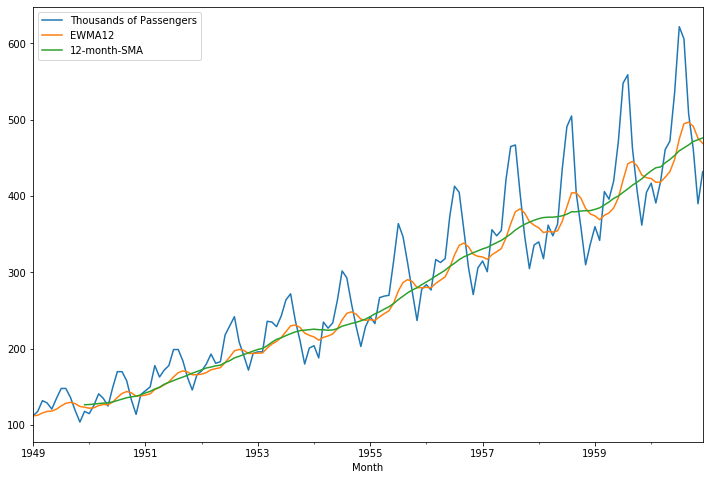

In [74]:
#note here that autoscale(axis = 'x', tight = True) resets the x axis so that the year is the origin, it begins there, compare it with the plot above to notive the 
# difference, not sure it matters much but you can do it
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis = 'x', tight = True);

## Simple Exponential Smoothing
The above example employed <em>Simple Exponential Smoothing</em> with one smoothing factor <strong>α</strong>. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above. 

# Holt-Winters Methods
In the previous section on <strong>Exponentially Weighted Moving Averages</strong> (EWMA) we applied <em>Simple Exponential Smoothing</em> using just one smoothing factor $\alpha$ (alpha). This failed to account for other contributing factors like trend and seasonality.

In this section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>
    
<h3>For Further Reading:</h3>
<tt>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc43.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>What is Exponential Smoothing?</font></tt></div>

In [75]:
#using the airline data again
airline.head()

,Thousands of Passengers,EWMA12,12-month-SMA
Month,,,
1949-01-01,112,112.000000,NaN
1949-02-01,118,112.923077,NaN
1949-03-01,132,115.857988,NaN
1949-04-01,129,117.879836,NaN
1949-05-01,121,118.359861,NaN


### Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [76]:
airline.index.freq = 'MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [122]:
#note that Simple Exponential Smoothing is a function in statsmodels that performs the same exact calculation as the ewm()
# function we used before, I am going to ignore this for now since knowing how to use ewm() covers simple exponential
# smoothing
#here is the code for it
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span = 12,adjust=False).mean()
airline['SES12']=SimpleExpSmoothing(airline['Thousands of Passengers']).fit(smoothing_level= alpha,optimized=False).fittedvalues.shift(-1)
airline.head()

,Thousands of Passengers,EWMA12,12-month-SMA,SES12,DESadd12,DESmul12
Month,,,,,,
1949-01-01,112.0,112.000000,NaN,112.000000,114.237762,112.049247
1949-02-01,118.0,112.923077,NaN,112.923077,120.237762,118.051885
1949-03-01,132.0,115.857988,NaN,115.857988,134.237762,132.058041
1949-04-01,129.0,117.879836,NaN,117.879836,131.237762,129.056722
1949-05-01,121.0,118.359861,NaN,118.359861,123.237762,121.053204


<div class="alert alert-danger"><strong>NOTE:</strong> For some reason, when <tt>optimized=False</tt> is passed into <tt>.fit()</tt>, the statsmodels <tt>SimpleExpSmoothing</tt> function shifts fitted values down one row. We fix this by adding <tt>.shift(-1)</tt> after <tt>.fittedvalues</tt></div>

## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [97]:
airline.dtypes

Thousands of Passengers      int64
EWMA12                     float64
12-month-SMA               float64
SES12                      float64
DESadd12                    object
dtype: object

__NOTE: I was getting an error message 'Buffer dtype mismatch, expected 'double' but got 'long long'' when I was running the double exponential smoothing, I had to transform the column 'Thousands of Passengers' from an int64 to float64 for the code to work for some reason, still not sure why__

In [98]:
airline['Thousands of Passengers'] = airline['Thousands of Passengers'].astype(np.float64)

In [115]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#notice here that we are using an additive model, perhaps multiplicative might be better?
airline['DESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
airline.head()

,Thousands of Passengers,EWMA12,12-month-SMA,SES12,DESadd12
Month,,,,,
1949-01-01,112.0,112.000000,NaN,112.000000,114.237762
1949-02-01,118.0,112.923077,NaN,112.923077,120.237762
1949-03-01,132.0,115.857988,NaN,115.857988,134.237762
1949-04-01,129.0,117.879836,NaN,117.879836,131.237762
1949-05-01,121.0,118.359861,NaN,118.359861,123.237762


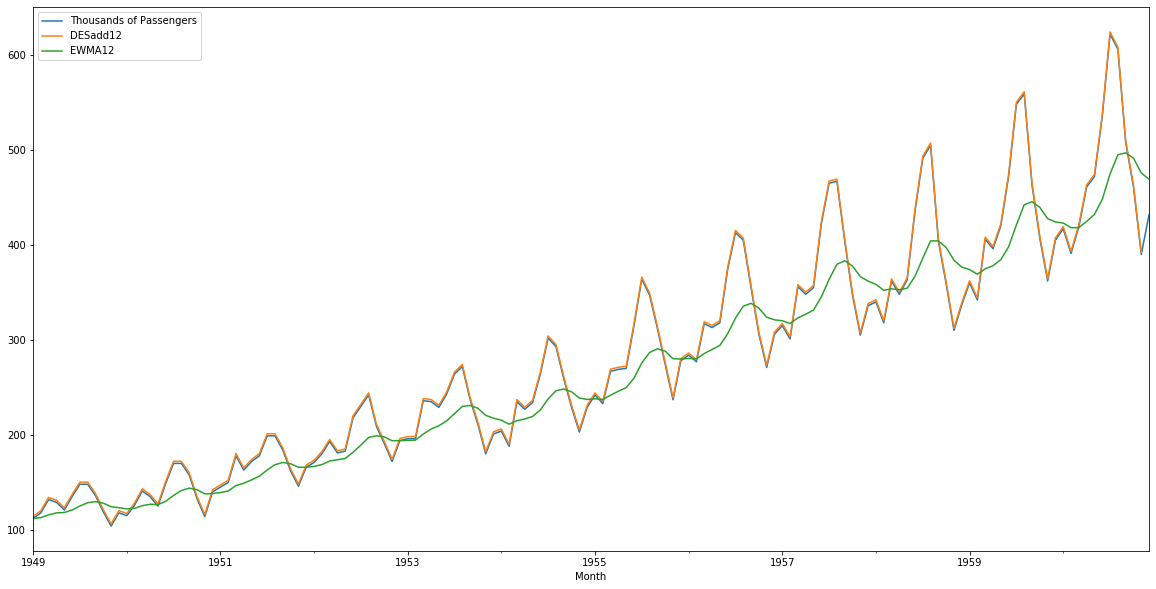

In [108]:
#you can see that the Double Exponential Smoothing fits the data even better than the Single Exponential Smoothing, 
#but to look more closely at how the DES is fitting the data we need to zoom in on a shorter time period
airline[['Thousands of Passengers', 'DESadd12', 'EWMA12']].plot()

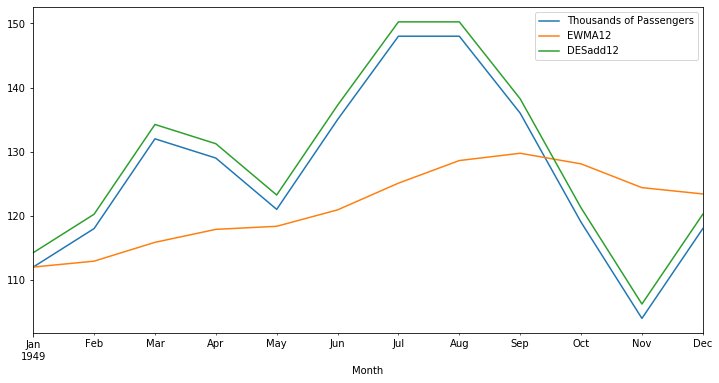

In [111]:
#now you can see that the model doesn't quite fit the data perfectly looking at it over one year
airline[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:12].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [116]:
#now lets see if the model changes when we use a multiplicative model
airline['DESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

In [117]:
airline.head()

,Thousands of Passengers,EWMA12,12-month-SMA,SES12,DESadd12,DESmul12
Month,,,,,,
1949-01-01,112.0,112.000000,NaN,112.000000,114.237762,112.049247
1949-02-01,118.0,112.923077,NaN,112.923077,120.237762,118.051885
1949-03-01,132.0,115.857988,NaN,115.857988,134.237762,132.058041
1949-04-01,129.0,117.879836,NaN,117.879836,131.237762,129.056722
1949-05-01,121.0,118.359861,NaN,118.359861,123.237762,121.053204


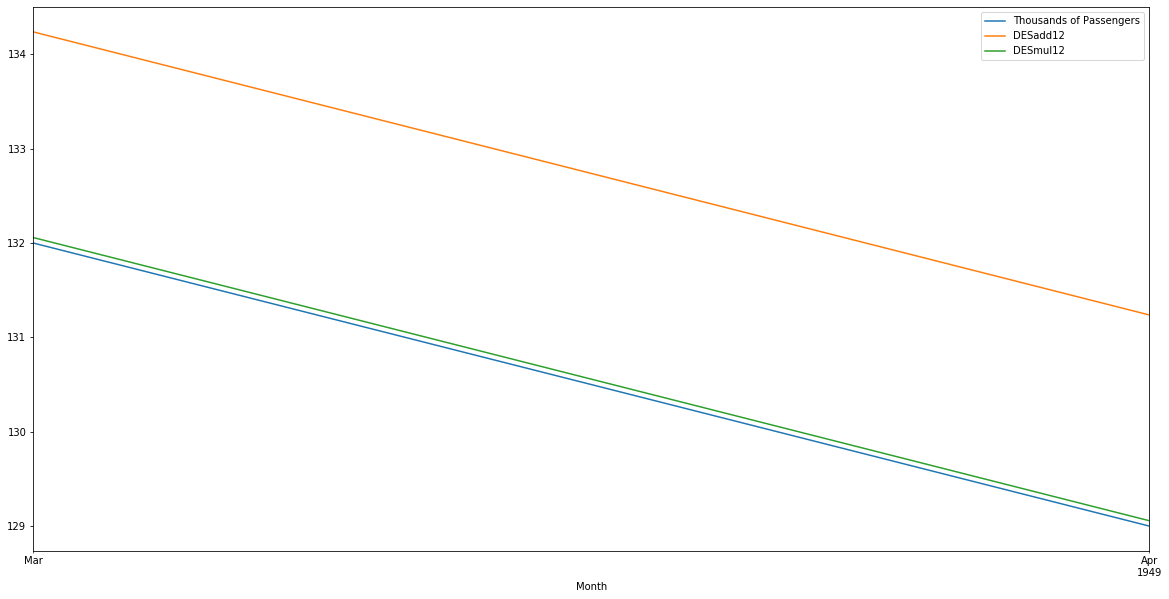

In [129]:
#this is an extremely close look at how the models are now fitting the data, you can see that the multiplicative model almost perfectly overlaps the data
airline[['Thousands of Passengers', 'DESadd12', 'DESmul12']].iloc[2:4].plot()

## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 


In [123]:
airline['TESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline.head()

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Thousands of Passengers,EWMA12,12-month-SMA,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,,
1949-01-01,112.0,112.000000,NaN,112.000000,114.237762,112.049247,113.081288
1949-02-01,118.0,112.923077,NaN,112.923077,120.237762,118.051885,120.550753
1949-03-01,132.0,115.857988,NaN,115.857988,134.237762,132.058041,135.527339
1949-04-01,129.0,117.879836,NaN,117.879836,131.237762,129.056722,133.155076
1949-05-01,121.0,118.359861,NaN,118.359861,123.237762,121.053204,125.656129


In [124]:
#note here that the values for TESmul12 are slightly different than those that were found in the class, I wonder if the model algorithm has been 
#tweaked a bit since the time that the class was created
airline['TESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline.head()

,Thousands of Passengers,EWMA12,12-month-SMA,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,,
1949-01-01,112.0,112.000000,NaN,112.000000,114.237762,112.049247,113.081288,111.608110
1949-02-01,118.0,112.923077,NaN,112.923077,120.237762,118.051885,120.550753,118.853687
1949-03-01,132.0,115.857988,NaN,115.857988,134.237762,132.058041,135.527339,133.343675
1949-04-01,129.0,117.879836,NaN,117.879836,131.237762,129.056722,133.155076,127.912641
1949-05-01,121.0,118.359861,NaN,118.359861,123.237762,121.053204,125.656129,120.991626


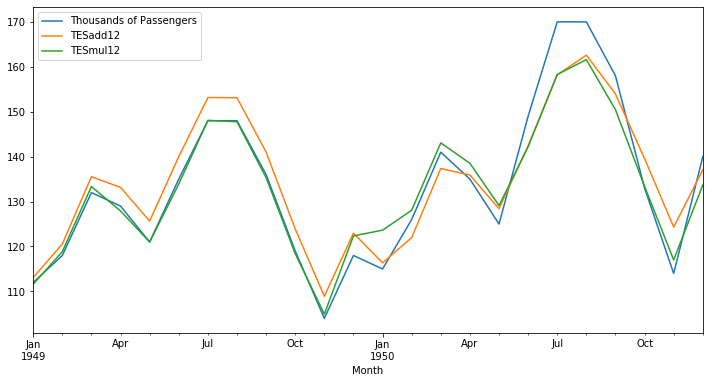

In [127]:
#while this plot may lead one to think that the add model fits the data better, there is an important consideration to take into account with respect to 
# how the future data will be forecasted! Having the ability to predict seasonality and other fluctuations, accounted for by multiplicative models, greatly improves
# the ability for a model to forecast accurately 
airline[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);